## Ejemplo 3: Nltk Text

### 1. Objetivos:
    - Aprender a usar el objeto Text de la biblioteca Nltk
 
---
    
### 2. Desarrollo:

Vamos a utilizar la librería Nltk para explorar algunas técnicas básicas de procesamiento de lenguaje natural. Muchos de estos procedimientos normalmente sirven para preparar nuestros datos para entrenar un modelo o para realizar una visualización.

In [1]:
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_json('../../Datasets/new_york_times_bestsellers-clean.json')

df.head()

,amazon_product_url,author,description,publisher,title,oid,bestsellers_date.numberLong,published_date.numberLong,rank.numberInt,rank_last_week.numberInt,weeks_on_list.numberInt,price.numberDouble
0,http://www.amazon.com/The-Host-Novel-Stephenie...,Stephenie Meyer,Aliens have taken control of the minds and bod...,"Little, Brown",THE HOST,5b4aa4ead3089013507db18c,1211587200000,1212883200000,2,1,3,25.99
1,http://www.amazon.com/Love-Youre-With-Emily-Gi...,Emily Giffin,A woman's happy marriage is shaken when she en...,St. Martin's,LOVE THE ONE YOU'RE WITH,5b4aa4ead3089013507db18d,1211587200000,1212883200000,3,2,2,24.95
2,http://www.amazon.com/The-Front-Garano-Patrici...,Patricia Cornwell,A Massachusetts state investigator and his tea...,Putnam,THE FRONT,5b4aa4ead3089013507db18e,1211587200000,1212883200000,4,0,1,22.95
3,http://www.amazon.com/Snuff-Chuck-Palahniuk/dp...,Chuck Palahniuk,An aging porn queens aims to cap her career by...,Doubleday,SNUFF,5b4aa4ead3089013507db18f,1211587200000,1212883200000,5,0,1,24.95
4,http://www.amazon.com/Sundays-at-Tiffanys-Jame...,James Patterson and Gabrielle Charbonnet,A woman finds an unexpected love,"Little, Brown",SUNDAYS AT TIFFANY’S,5b4aa4ead3089013507db190,1211587200000,1212883200000,6,3,4,24.99


In [3]:
grouped_by_title = df.groupby('title')['description'].max()

grouped_by_title

title
10TH ANNIVERSARY            Detective Lindsay Boxer and the Women’s Murder...
11TH HOUR                   Detective Lindsay Boxer and the Women’s Murder...
1225 CHRISTMAS TREE LANE    Puppies and an ex-husband loom large in the la...
1356                        In the fourth book of the Grail Quest series, ...
1Q84                        In 1980s Tokyo, a woman who punishes perpetrat...
                                                  ...                        
Z                           A novel based on the lives of Zelda and F. Sco...
ZERO DAY                       A military investigator uncovers a conspiracy.
ZERO HISTORY                Several characters from “Spook Country” return...
ZONE ONE                      Fighting zombies in post-apocalyptic Manhattan.
ZOO                         A young biologist warns world leaders about th...
Name: description, Length: 754, dtype: object

Primero hay que limpiar un poco nuestros textos:

In [4]:
grouped_by_title = grouped_by_title.str.lower()
grouped_by_title = grouped_by_title.str.strip()
grouped_by_title = grouped_by_title.str.replace('[^\w\s]', '')
grouped_by_title = grouped_by_title.str.replace('\d', '')
grouped_by_title = grouped_by_title.str.replace('\\n', '')
grouped_by_title = grouped_by_title.dropna()

grouped_by_title

title
10TH ANNIVERSARY            detective lindsay boxer and the womens murder ...
11TH HOUR                   detective lindsay boxer and the womens murder ...
1225 CHRISTMAS TREE LANE    puppies and an exhusband loom large in the las...
1356                        in the fourth book of the grail quest series t...
1Q84                        in s tokyo a woman who punishes perpetrators o...
                                                  ...                        
Z                           a novel based on the lives of zelda and f scot...
ZERO DAY                        a military investigator uncovers a conspiracy
ZERO HISTORY                several characters from spook country return t...
ZONE ONE                        fighting zombies in postapocalyptic manhattan
ZOO                         a young biologist warns world leaders about th...
Name: description, Length: 754, dtype: object

Ahora, vamos a construir un objeto Text con nuestros datos. Primero que nada necesitamos descargar algunas bibliotecas que requiere `nltk` para funcionar. Ve a tu terminal, abre python, importa nltk y usa el siguiente comando:

`nltk.download('punkt')`

Ahora sí, estamos listos:

In [5]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\msr_l\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
# Separamos cada oración en palabras

tokenized = grouped_by_title.apply(nltk.word_tokenize)

In [7]:
tokenized

title
10TH ANNIVERSARY            [detective, lindsay, boxer, and, the, womens, ...
11TH HOUR                   [detective, lindsay, boxer, and, the, womens, ...
1225 CHRISTMAS TREE LANE    [puppies, and, an, exhusband, loom, large, in,...
1356                        [in, the, fourth, book, of, the, grail, quest,...
1Q84                        [in, s, tokyo, a, woman, who, punishes, perpet...
                                                  ...                        
Z                           [a, novel, based, on, the, lives, of, zelda, a...
ZERO DAY                    [a, military, investigator, uncovers, a, consp...
ZERO HISTORY                [several, characters, from, spook, country, re...
ZONE ONE                    [fighting, zombies, in, postapocalyptic, manha...
ZOO                         [a, young, biologist, warns, world, leaders, a...
Name: description, Length: 754, dtype: object

In [8]:
# Sumamos todas las listas para obtener una lista con todas las palabras en nuestro conjunto de datos
# Creamos un objeto Text

all_words = tokenized.sum()
text = nltk.Text(all_words)

text

<Text: detective lindsay boxer and the womens murder club...>

In [9]:
text.concordance('woman', lines=20)

Displaying 20 of 60 matches:
 the battle of poitiers in s tokyo a woman who punishes perpetrators of domesti
of mishandling an autopsy a pregnant woman shows up in cedar cove on christmas 
e nothing is as it seems a middleage woman takes a crosscountry road trip with 
ment a young beautiful and ambitious woman ruthlessly ascends the heights of th
ring of humans and heavenly beings a woman in her late s marries the man of her
e ichidian universe a smuggler and a woman warrior must fight together to survi
paloosa trilogy two lawmen protect a woman one of them loves in frenchs fourth 
e an arcane society novel a southern woman is forever changed by the betrayals 
illipss earlier novels reappear as a woman persuades a friend to call off her w
plot to kill thousands of citizens a woman asks the boston detective dd warren 
arker in pursuing a dangerous case a woman joins with her estranged former step
texas fbi agent falls in love with a woman with a past lara callandine an exper
 wealthy co

In [10]:
# similar te regresa las palabras que aparecen en contextos similares al argumento

text.similar('woman')

man widow killer series war case doctor yearold friend boy target
yacht murder nanny group secret witch massacre mystery family


In [11]:
text.similar('women')

murder war love crimes killer battle resent administration eve life
recovery night state summer eyes wheel mother daughter author secrets


In [12]:
text.concordance('man', lines=20)

Displaying 20 of 35 matches:
ngs a woman in her late s marries the man of her dreams and reaches out to his 
tar hides his male lover a former hit man for the mob who has become a doctor i
y the betrayals of her mother and the man she loves intrigue on the planet safe
a in two agents are tracking the same man a human trafficker who is now dealing
lorida for a missing girl and the con man who seduced her a runaway girl and th
s deployed to iraq a distraught young man discovers that he has grown horns a s
 empire of charis fights to survive a man who kidnapped a yearold girl contacts
and cia stand in his way when a young man finds a bag of diamonds he gets the a
stigator maisie dobbs helps an indian man whose sisters murder has been ignored
al attacks a woman her daughter and a man accused of murder evade the authoriti
ooper becomes involved when a wealthy man assaults a maid in a manhattan hotel 
d as christmas nears a terminally ill man is preparing his family for his death
n involved 

In [13]:
text.similar('man')

killer woman widow murder war mystery case yearold vampire
disappearance target murderer yacht priest detective baby series
battle administration eve


In [14]:
text.similar('men')

s french president west truth culprit males governor


In [15]:
# common_contexts regresa los contextos que comparten dos o más palabras

text.common_contexts(['woman', 'man'])

a_in a_with a_who


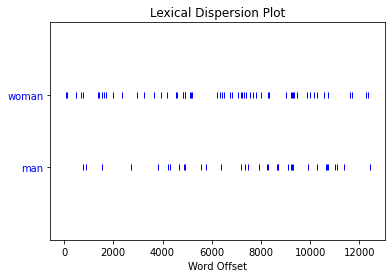

In [16]:
# En este caso una gráfica de dispersión no tiene mucho sentido, pero así es como se produce

text.dispersion_plot(['woman', 'man'])

In [17]:
# Podemos también generar texto que intenta imitar el estilo de nuestro conjunto de datos

print(text.generate())

Building ngram index...


on a global criminal enterprise behind a murder investigation a young
mans mysterious death in juan cabrillo and the age of flying machines
is still in its infancy detective isaac bells new adventure is taking
off malcolm bannister an imprisoned exlawyer knows who murdered a
federal agent is targeted for death but by whom a contingent of
arcosian descendants plan to help his mother the witch rachel morgan
book an army officer and a rival assassin who is bound for the
forensic sculptor eve duncan investigates when her clients start
getting murdered one by one a war erupts between old
on a global criminal enterprise behind a murder investigation a young
mans mysterious death in juan cabrillo and the age of flying machines
is still in its infancy detective isaac bells new adventure is taking
off malcolm bannister an imprisoned exlawyer knows who murdered a
federal agent is targeted for death but by whom a contingent of
arcosian descendants plan to help his mother the witch rachel morgan
b

In [18]:
# Total de palabras

len(text)

12569

In [19]:
# Total de palabras distintas

len(set(text))

3161

In [20]:
# Cuantificando la riqueza léxica

len(set(text)) / len(text)

0.2514917654546901

In [21]:
# Las colocaciones son pares de palabras (bigramas) que son inusualmente comunes en nuestro conjunto de datos

text.collocations()

new york; serial killer; stone barrington; los angeles; writing
pseudonymously; nora roberts; roberts writing; eve dallas; sookie
stackhouse; anita blake; dagger brotherhood; doc ford; jason bourne;
lacey sherlock; mitch rapp; temperance brennan; forensic sculptor;
alex cross; robert ludlums; san francisco
